In [1]:
from spectre_freq import *
from Preprocess import *
from recuperation import *
from Notebook_interactif import *
from ipywidgets import interact, interact_manual, IntSlider, FloatSlider, Dropdown, fixed
from IPython.display import display

c:\users\arthu\miniconda3\lib\site-packages\requests\__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.5) or chardet (4.0.0) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


Erreur : Il n'y a un probleme pour trouver la chronique
09433X0162%2FPIEZ extracted from server
Chronique 09433X0162%2FPIEZ trouvée


# Choix des stations à étudier :
Choisir les paramètres de recherche des stations qui seront retenues pour l'étude, puis appuyer sur Run Interact.

In [2]:
interact_manual(sauvegarde_locale_stations, Nech = IntSlider(min=100,max=4000),Npiezmin=IntSlider(min=0,max=2000),Npage=IntSlider(min=1,max=5))

interactive(children=(IntSlider(value=0, description='Npiezmin', max=2000), IntSlider(value=100, description='…

<function recuperation.sauvegarde_locale_stations(Npiezmin=10, Nech=20, Npage=1)>

# Visualisation des stations :
La prochaine cellule permet de visualiser les différentes stations de mesure de france métropolitaine. Les stations en les plus rouges sont celles avec le moins de mesure. Il est possible d'appliquer un filtre pour n'observer que les stations avec beaucoup de mesures. On obtient le code BSS des stations en passant la souris dessus.

In [49]:
table_stat = table_stations()
interact(visualisation, stations=fixed(table_stat), Nseuil = FloatSlider(min=0, max=2000, 
                                 step=10, value=10,
                                 continuous_update=False))

interactive(children=(FloatSlider(value=10.0, continuous_update=False, description='Nseuil', max=2000.0, step=…

<function Notebook_interactif.visualisation(stations, Nseuil)>

# Etude d'une chronique :
On écrit ensuite le code bss de la station que l'on souhaite étudier pour extraire la chronique associé.

In [50]:
code_bss = '09433X0162%2FPIEZ'

dataframe = extract_chronique(code_bss)


Erreur : Il n'y a un probleme pour trouver la chronique
09433X0162%2FPIEZ extracted from server
Chronique 09433X0162%2FPIEZ trouvée


Preprocessing de la chronique de la station :

In [51]:
dataframe = label_and_interpol_df(dataframe, tolerance = 7)

dataframe = filtre_valeur_aberrante(dataframe, normalize = True)

dataframe

,code_bss,niveau_nappe_eau,date_mesure,timestamp_mesure,label_new_value
0,09433X0162/PIEZ,2.281382,2001-3-27,985688220000,0
1,09433X0162/PIEZ,2.441222,2001-3-29,985824000000,0
2,09433X0162/PIEZ,2.345318,2001-3-30,985946400000,0
3,09433X0162/PIEZ,2.217446,2001-3-31,986068800000,0
4,09433X0162/PIEZ,1.929735,2001-4-6,986598000000,0
...,...,...,...,...,...
5214,09433X0162/PIEZ,0.427241,2019-9-25,1569412800000,0
5215,09433X0162/PIEZ,0.395273,2019-9-26,1569495600000,0
5216,09433X0162/PIEZ,0.395273,2019-9-27,1569567600000,0
5217,09433X0162/PIEZ,0.363305,2019-9-28,1569650400000,0


In [52]:
newdf = regularize_timestep(dataframe, 'linear')

Analyse de la chronique :

In [57]:
interact_manual(show_spectrum,
         table = fixed(newdf),
         filter = ['none','passe_bas'],
         f_coupure = FloatSlider(min=0,max=0.1, step=0.001)
        )

interactive(children=(Dropdown(description='filter', options=('none', 'passe_bas'), value='none'), FloatSlider…

<function spectre_freq.show_spectrum(table, filter='none', f_coupure=0.1)>

In [64]:
df_modified=newdf
interact_manual(filtrage, table = fixed(df_modified), filter=fixed('passe_bas'),freq_coupure = FloatSlider(min=0,max=0.200,value=0.2,step=0.001)
)

interactive(children=(FloatSlider(value=0.2, description='freq_coupure', max=0.2, step=0.001), Button(descript…

<function spectre_freq.filtrage(table, filter='passe_bas', freq_coupure=0.1)>

<IPython.core.display.Javascript object>


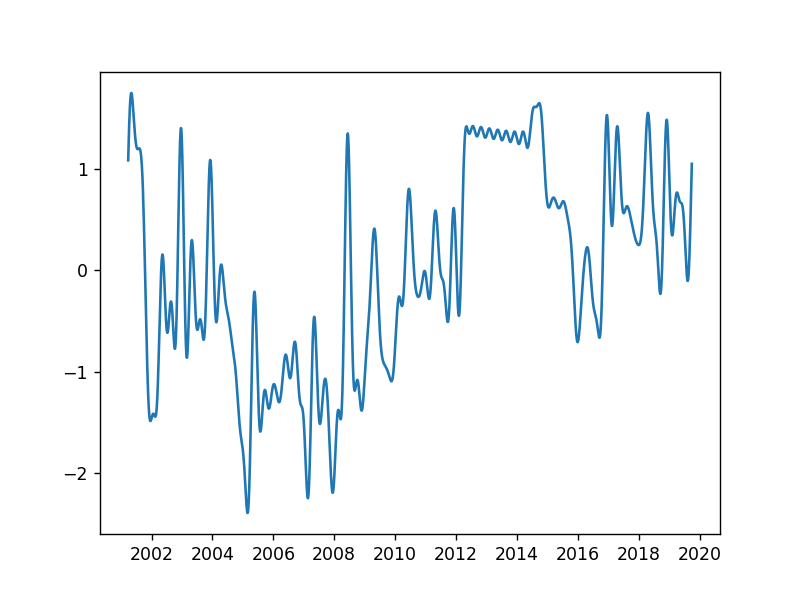

c:\users\arthu\miniconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [65]:
fig,ax=plt.subplots()
ax.plot(df_modified['date_mesure'],df_modified['niveau_nappe_eau'])